# Asset Characteristics

Compare ASX200, CBA, CSL; consider other indices or assets

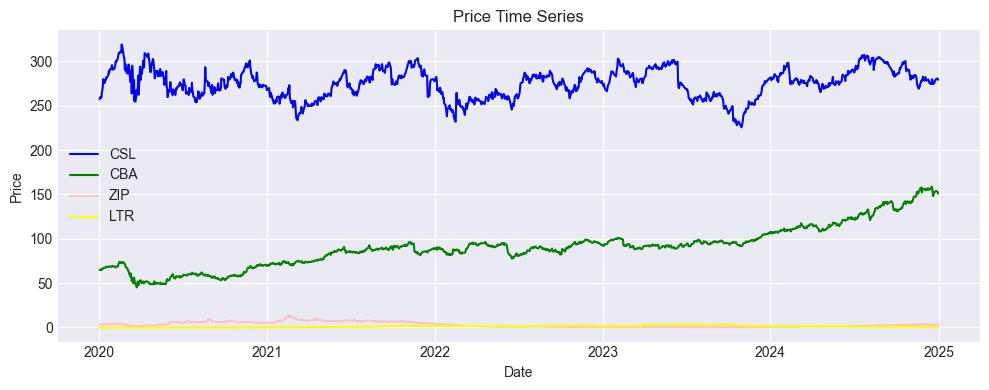

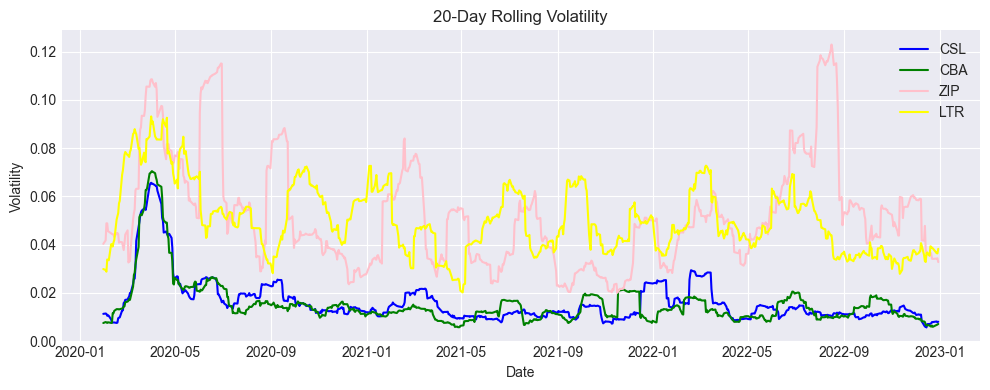

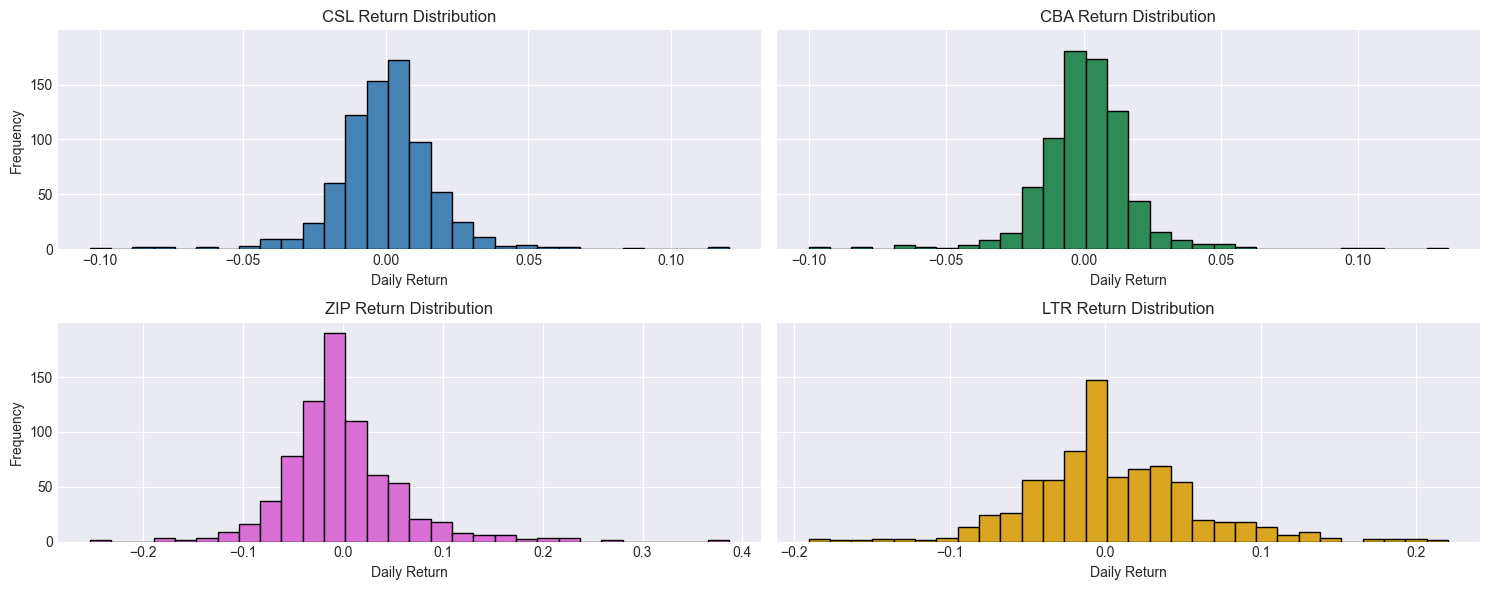

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the full dataset
df = pd.read_csv("combined_stock_data.csv", parse_dates=['Date'])

tickers = ['CSL', 'CBA', 'ZIP', 'LTR']

df_filtered = df[df['Name'].isin(tickers)].copy()
df_filtered.sort_values(by=['Date', 'Name'], inplace=True)

# Pivot to wide format: Date as index, columns as ticker names
df_wide = df_filtered.pivot(index='Date', columns='Name', values='Close')

# Drop rows with missing values in either CSL or CBA
df_wide.dropna(inplace=True)

# Calculate returns and rolling vol
returns = df_wide.pct_change().dropna()
rolling_vol = returns.rolling(window=20).std()

# Plot 1: Price Time Series
plt.figure(figsize=(10, 4))
plt.plot(df_wide.index, df_wide['CSL'], label='CSL', color='blue')
plt.plot(df_wide.index, df_wide['CBA'], label='CBA', color='green')
plt.plot(df_wide.index, df_wide['ZIP'], label='ZIP', color='pink')
plt.plot(df_wide.index, df_wide['LTR'], label='LTR', color='yellow')
plt.title("Price Time Series")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

### Rolling Volatility
returns = combined_wide.pct_change()
rolling_vol = returns.rolling(window=20).std()

# Plot 2: Volatility
plt.figure(figsize=(10, 4))
plt.plot(rolling_vol.index, rolling_vol['CSL'], label='CSL', color='blue')
plt.plot(rolling_vol.index, rolling_vol['CBA'], label='CBA', color='green')
plt.plot(rolling_vol.index, rolling_vol['ZIP'], label='ZIP', color='pink')
plt.plot(rolling_vol.index, rolling_vol['LTR'], label='LTR', color='yellow')
plt.title("20-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.tight_layout()
plt.show()

# Plot 3: Return Histograms
assets = ['CSL', 'CBA', 'ZIP', 'LTR']
colors = {
    'CSL': 'steelblue',
    'CBA': 'seagreen',
    'ZIP': 'orchid',
    'LTR': 'goldenrod'
}

fig, axes = plt.subplots(2, 2, figsize=(15, 6), sharey=True)
axes = axes.flatten()  # make it easy to index like a 1D array

for i, asset in enumerate(assets):
    axes[i].hist(returns[asset].dropna(), bins=30, color=colors[asset], edgecolor='black')
    axes[i].set_title(f"{asset} Return Distribution")
    axes[i].set_xlabel("Daily Return")
    if i % 2 == 0:
        axes[i].set_ylabel("Frequency")

# Remove unused subplot if needed
if len(assets) < len(axes):
    for j in range(len(assets), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


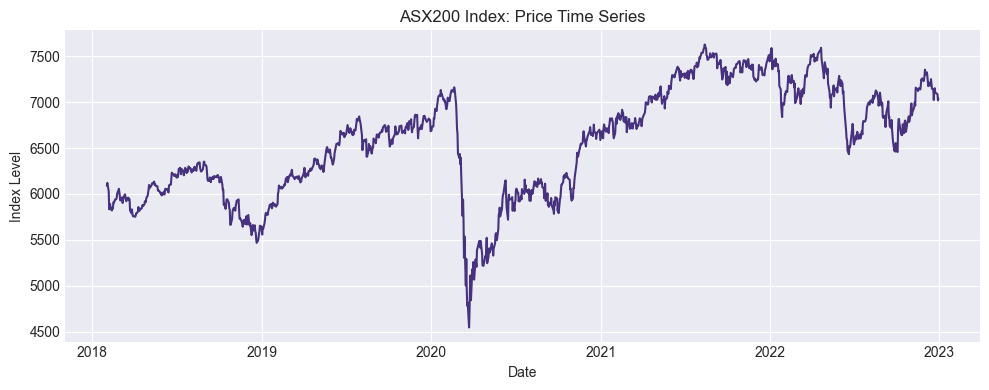

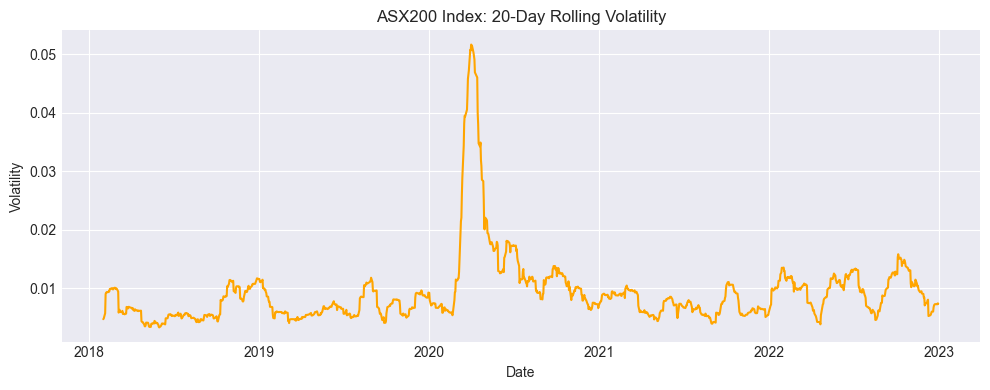

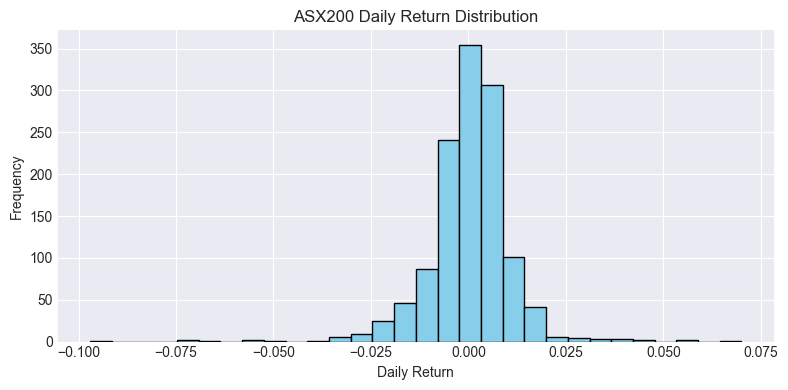

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")

# --- Load processed ASX200 data ---
file_path = "asx200_cleaned_data.csv"  
df = pd.read_csv(file_path, parse_dates=['date'])

# --- Check required columns ---
assert {'date', 'Close'}.issubset(df.columns), "CSV must contain 'date' and 'Close' columns."

# --- Set index and calculate returns ---
df.set_index('date', inplace=True)
df = df.sort_index()
df['Return'] = df['Close'].pct_change()
df['RollingVol'] = df['Return'].rolling(window=20).std()
df.dropna(inplace=True)

# --- Plot 1: ASX200 Price Time Series ---
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Close'])
plt.title("ASX200 Index: Price Time Series")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.tight_layout()
plt.show()

# --- Plot 2: 20-Day Rolling Volatility ---
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['RollingVol'], color='orange')
plt.title("ASX200 Index: 20-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.tight_layout()
plt.show()

# --- Plot 3: Return Distribution ---
plt.figure(figsize=(8, 4))
plt.hist(df['Return'], bins=30, color='skyblue', edgecolor='black')
plt.title("ASX200 Daily Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


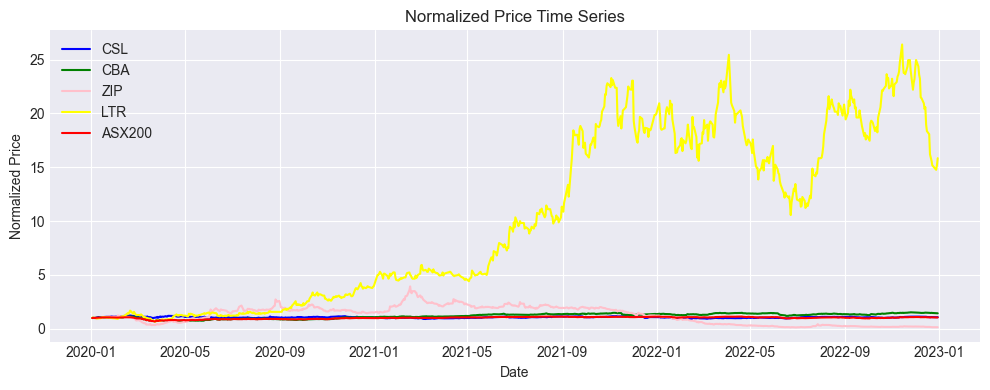

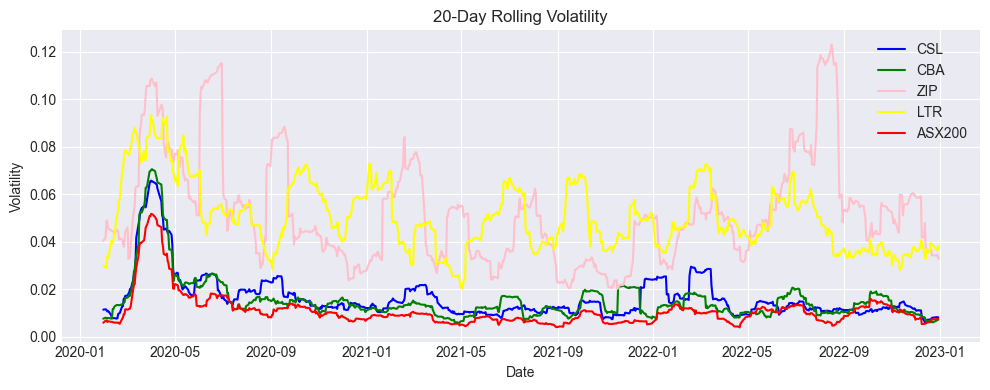

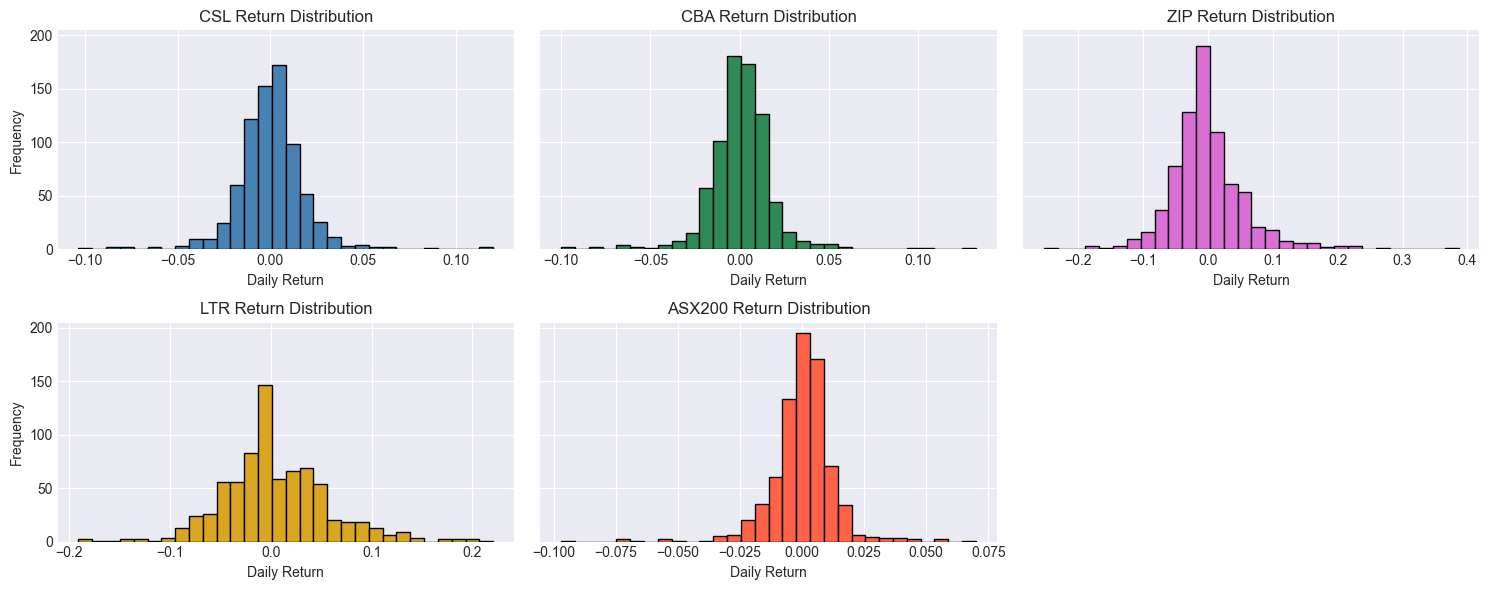

In [18]:
### Load CSL & CBA
combined_df = pd.read_csv("combined_stock_data.csv", parse_dates=['Date'])
combined_df = combined_df[combined_df['Name'].isin(['CSL', 'CBA', 'ZIP', 'LTR'])]
combined_df = combined_df[['Date', 'Name', 'Close']].dropna()
combined_df['Close'] = pd.to_numeric(combined_df['Close'], errors='coerce')
combined_df.dropna(inplace=True)
combined_wide = combined_df.pivot(index='Date', columns='Name', values='Close').dropna()

### Load ASX200
asx_df = pd.read_csv("asx200_cleaned_data.csv", parse_dates=['date'])
asx_df = asx_df[['date', 'Close']].rename(columns={'date': 'Date'})
asx_df['Close'] = pd.to_numeric(asx_df['Close'], errors='coerce')
asx_df.dropna(inplace=True)
asx_df.set_index('Date', inplace=True)
asx_df = asx_df.sort_index()

combined_wide = combined_wide.join(asx_df.rename(columns={'Close': 'ASX200'}), how='inner')

### Normalize
normalized = combined_wide / combined_wide.iloc[0]

# Plot 1: Normalized Price
plt.figure(figsize=(10, 4))
plt.plot(normalized.index, normalized['CSL'], label='CSL', color='blue')
plt.plot(normalized.index, normalized['CBA'], label='CBA', color='green')
plt.plot(normalized.index, normalized['ZIP'], label='ZIP', color='pink')
plt.plot(normalized.index, normalized['LTR'], label='LTR', color='yellow')
plt.plot(normalized.index, normalized['ASX200'], label='ASX200', color='red')
plt.title("Normalized Price Time Series")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.tight_layout()
plt.show()

### Rolling Volatility
returns = combined_wide.pct_change()
rolling_vol = returns.rolling(window=20).std()

# Plot 2: Volatility
plt.figure(figsize=(10, 4))
plt.plot(rolling_vol.index, rolling_vol['CSL'], label='CSL', color='blue')
plt.plot(rolling_vol.index, rolling_vol['CBA'], label='CBA', color='green')
plt.plot(rolling_vol.index, rolling_vol['ZIP'], label='ZIP', color='pink')
plt.plot(rolling_vol.index, rolling_vol['LTR'], label='LTR', color='yellow')
plt.plot(rolling_vol.index, rolling_vol['ASX200'], label='ASX200', color='red')
plt.title("20-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.tight_layout()
plt.show()

# Plot 3: Return Histograms
assets = ['CSL', 'CBA', 'ZIP', 'LTR', 'ASX200']
colors = {
    'CSL': 'steelblue',
    'CBA': 'seagreen',
    'ZIP': 'orchid',
    'LTR': 'goldenrod',
    'ASX200': 'tomato'
}

fig, axes = plt.subplots(2, 3, figsize=(15, 6), sharey=True)
axes = axes.flatten()  # make it easy to index like a 1D array

for i, asset in enumerate(assets):
    axes[i].hist(returns[asset].dropna(), bins=30, color=colors[asset], edgecolor='black')
    axes[i].set_title(f"{asset} Return Distribution")
    axes[i].set_xlabel("Daily Return")
    if i % 3 == 0:
        axes[i].set_ylabel("Frequency")

# Remove unused subplot if needed
if len(assets) < len(axes):
    for j in range(len(assets), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [8]:
print("Combined data date range:", combined_wide.index.min().date(), "to", combined_wide.index.max().date())


Combined data date range: 2020-01-02 to 2022-12-30


📊 Comparative Analysis of Price Trends and Volatility
### 1. **Normalized Price Time Series (2020–2022)**
The first chart compares the **normalized price movements** of five assets: **CSL, CBA, ZIP, LTR, and ASX200**.

- **LTR** (yellow): Shows **explosive growth**, rising over **2500%** from the baseline in 2021–2022 before undergoing correction. It clearly stands out as a **high-growth, high-volatility** stock.

- **ZIP** (pink): Also exhibits significant price volatility, with spikes followed by steep corrections, characteristic of a speculative asset.

- **CBA** (green) and **ASX200** (red): These two show **steady, stable growth**, indicating their role as **core defensive assets** in portfolios.

- **CSL**(blue): Demonstrates moderate variability, more volatile than ASX200 but less extreme than LTR/ZIP.

📌 **Insight**: CBA and ASX200 are more suited for conservative investors, while ZIP and LTR represent riskier, growth-oriented investments.

### 2. **20-Day Rolling Volatility**
The second chart depicts the **20-day rolling volatility** of each asset:

- **ZIP** and **LTR** consistently maintain the highest volatility, especially during market stress periods (e.g., early 2020, mid-2022).

- **CSL** exhibits intermediate volatility with periodic spikes, such as early 2021 and 2022.

- **CBA** and **ASX200** maintain **low and stable volatility**, indicating lower investment risk.

📌 **Insight**: This plot confirms the volatility rankings observed in the price series. **LTR** and **ZIP** are ideal test cases for assessing the adaptability of neural network models.

### 3. **Return Distribution Comparison**
Each histogram shows the **distribution of daily returns** for the respective asset:

- **CBA** and **ASX200** have the **most concentrated return distributions**, centered tightly around zero — reflecting **low-risk, low-return** behavior.

- **ZIP** and **LTR** show **fat tails** and **wider spreads**, consistent with their high volatility and potential for extreme gains/losses.

- **CSL** falls between the two extremes, making it a **balanced candidate** for strategic forecasting models.

📌 **Insight**: These return distributions help inform **model selection** based on investor risk appetite.